## **Data Analysis using python - BLINKIT ANALYSIS**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import Raw data
df = pd.read_csv("BlinkIT_Data.csv")

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.shape

(8523, 12)

In [5]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [6]:
df = df.dropna(subset=['Item Weight'])

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7060 entries, 0 to 8245
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           7060 non-null   object 
 1   Item Identifier            7060 non-null   object 
 2   Item Type                  7060 non-null   object 
 3   Outlet Establishment Year  7060 non-null   int64  
 4   Outlet Identifier          7060 non-null   object 
 5   Outlet Location Type       7060 non-null   object 
 6   Outlet Size                7060 non-null   object 
 7   Outlet Type                7060 non-null   object 
 8   Item Visibility            7060 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      7060 non-null   float64
 11  Rating                     7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


### Data Cleaning

In [9]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat': 'Low Fat','reg': 'Regular'})

In [11]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### **BUSINESS REQUIREMENTS**

### KPI's REQUIREMENTS

In [12]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No of Items Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()


#Display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.1f}")

Total Sales: $997,159
Average Sales: $141
No of Items Sold: 7,060
Average Ratings: 4.0


### CHARTS REQUIREMENTS


#### Total Sales by Fat Content

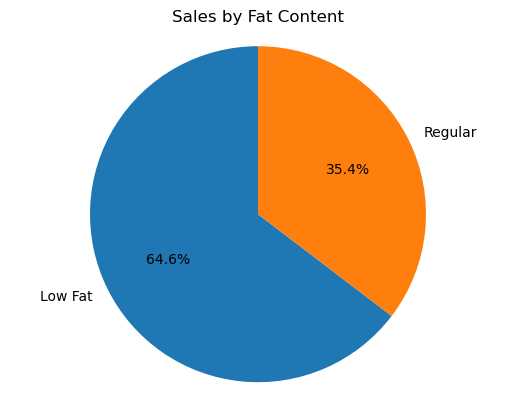

In [13]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,autopct = "%0.1f%%",startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

 #### Total Sales by Item Type

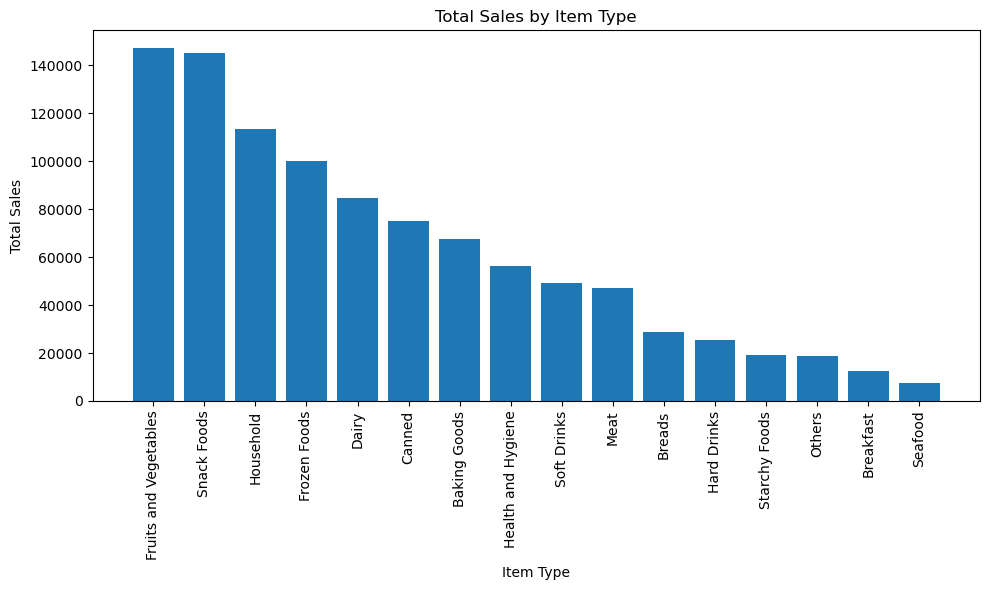

In [14]:
sales_by_type = df.groupby('Item Type')['Sales']. sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')


plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

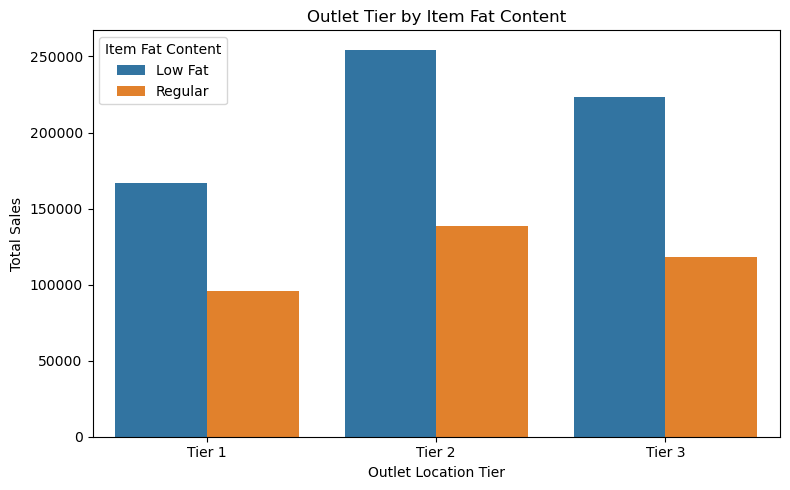

In [15]:
# Group and summarize data
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().reset_index()


# Filter only "Regular" and "Low Fat"
grouped = grouped[grouped['Item Fat Content'].isin(['Regular', 'Low Fat'])]

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped,x='Outlet Location Type',y='Sales',hue='Item Fat Content')

plt.title('Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


#### Sales By Outlet Size

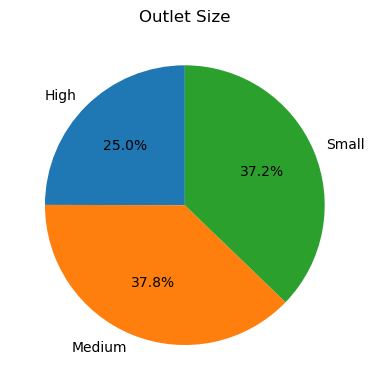

In [16]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### Sales By Outlet Location

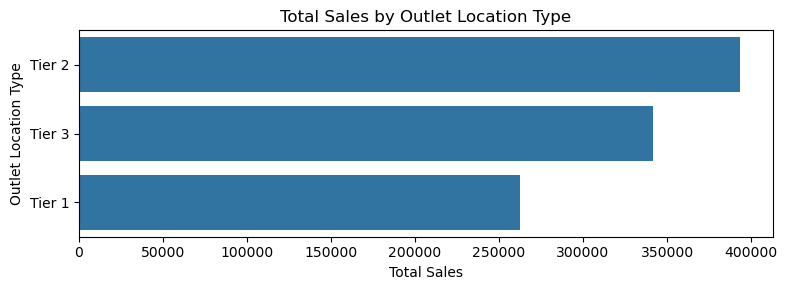

In [17]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location. sort_values('Sales', ascending=False)
plt.figure(figsize=(8, 3)) # Smaller height, enough width

ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() # Ensures Layout fits without scroll
plt.show()